<a href="https://colab.research.google.com/github/nithya-kuzhanthaivel/Nan-Mudhalvan/blob/main/NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('customer_churn.csv')
df.head()

Saving customer_churn.csv to customer_churn.csv


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,Yes,No,DSL,No,Yes,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,Male,0,No,No,34,Yes,No,Fiber optic,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,No,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,No,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check the column names in the DataFrame
print(df.columns)

# Based on the output, correct the column name in the drop command
# For example, if the column name is 'CustomerID', use:


# OR if you're not sure which columns exist, and you want to drop a column if it exists:
if 'customerID' in df.columns:
    df.drop(['customerID'], axis=1, inplace=True)
# Continue with the rest of your code
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        df[column] = LabelEncoder().fit_transform(df[column])



In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [ ]:
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



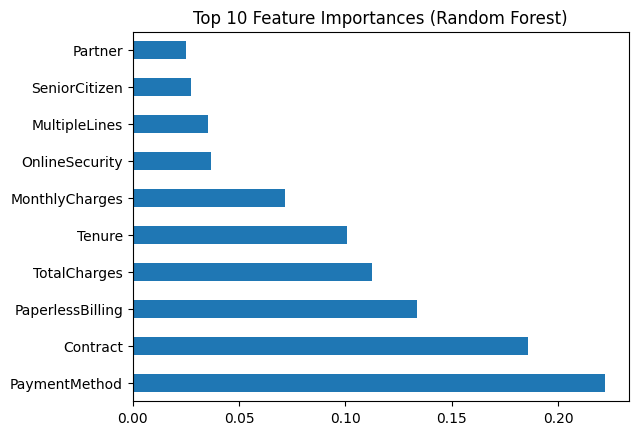

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Gradio interface function
def predict_churn(**kwargs):
    input_df = pd.DataFrame([kwargs])

    # Encode categorical features
    for col in input_df.columns:
        if col in label_encoders:
            try:
                input_df[col] = label_encoders[col].transform([input_df[col]])  # encode single value
            except ValueError:
                return f"Invalid value '{input_df[col].iloc[0]}' for feature '{col}'. Expected one of: {label_encoders[col].classes_}"

    # Scale numerical inputs
    try:
        input_scaled = scaler.transform(input_df)
    except Exception as e:
        return f"Scaling error: {str(e)}"

    # Predict
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    return f"{'Churn' if prediction == 1 else 'No Churn'} ({probability:.2%} confidence)"

